In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [2]:
X=iris["data"][:,0:2]
y=iris["target"]# taking all the three features for multinomial classifxn

In [3]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

c:\python36\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


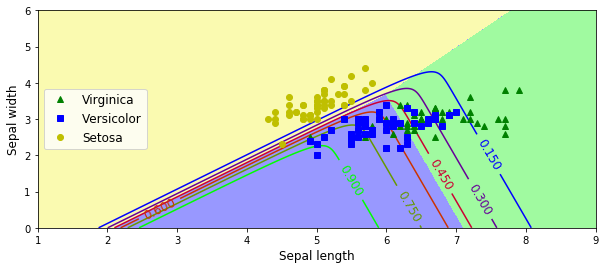

In [7]:
x0, x1 = np.meshgrid(
        np.linspace(1, 9, 1000).reshape(-1, 1),
        np.linspace(0, 6, 1000).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Sepal width", fontsize=12)
plt.legend(loc="center left", fontsize=12)
plt.axis([1, 9, 0, 6])
plt.show()